In [19]:
from google.colab import files
uploaded = files.upload()


Saving survey_data.csv to survey_data.csv


In [20]:
!pip install pandas nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk


df = pd.read_json("final_tweet_data.json", lines=True)

sia = SentimentIntensityAnalyzer()


df["sentiment_score"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])


def classify_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df["sentiment"] = df["sentiment_score"].apply(classify_sentiment)


df["timestamp"] = pd.to_datetime(df["timestamp"])


print(df[["timestamp", "text", "sentiment_score", "sentiment"]].head())


df.to_csv("tweets_with_sentiment.csv", index=False)

   timestamp                                            text  sentiment_score  \
0 2024-05-17           2 exams. 1 projects. Send help - 2b86           0.4019   
1 2024-03-01                   Essays got me like '😩' - 036e           0.3612   
2 2024-06-11        5 exams. 3 projects. I’m not okay - a271          -0.1695   
3 2024-05-18  Library snacks: chips. Mood: delusional - b0a9           0.0000   
4 2024-05-20   Library snacks: ramen. Mood: exhausted - b795          -0.3612   

  sentiment  
0  positive  
1  positive  
2  negative  
3   neutral  
4  negative  


In [22]:
from google.colab import files
files.download('tweets_with_sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

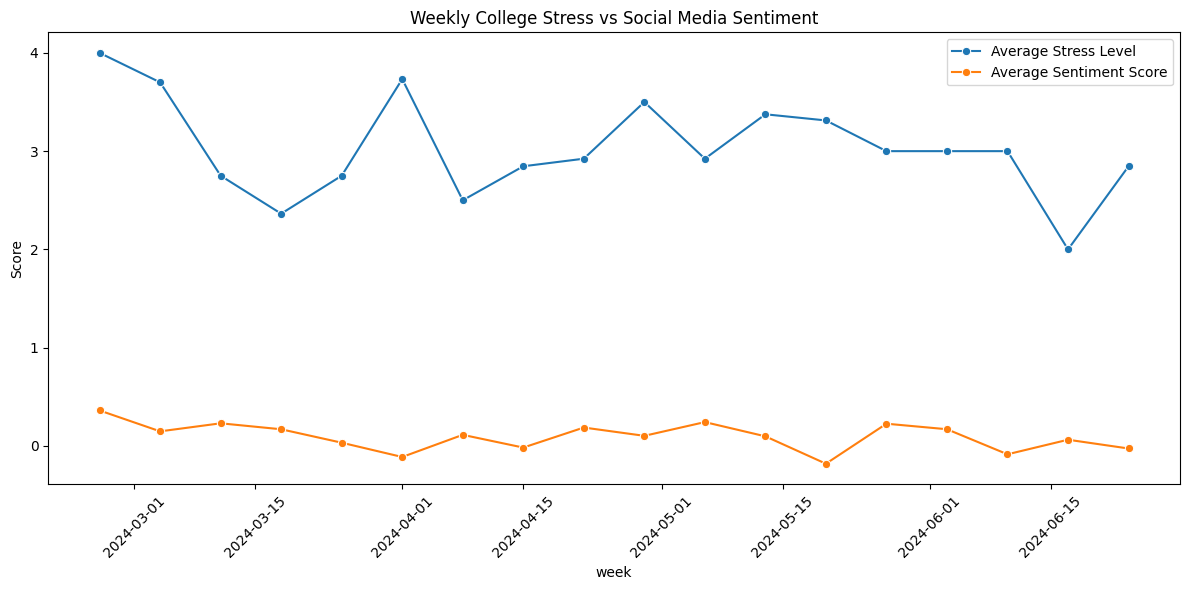

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


survey_df = pd.read_csv("survey_data.csv")
tweet_df = pd.read_csv("tweets_with_sentiment.csv")


survey_df["Timestamp"] = pd.to_datetime(survey_df["Timestamp"])
tweet_df["timestamp"] = pd.to_datetime(tweet_df["timestamp"])


survey_df["week"] = survey_df["Timestamp"].dt.to_period("W").apply(lambda r: r.start_time)
tweet_df["week"] = tweet_df["timestamp"].dt.to_period("W").apply(lambda r: r.start_time)


weekly_stress = survey_df.groupby("week")["Stress_Level"].mean().reset_index()
weekly_stress.rename(columns={"Stress_Level": "avg_stress"}, inplace=True)

weekly_sentiment = tweet_df.groupby("week")["sentiment_score"].mean().reset_index()
weekly_sentiment.rename(columns={"sentiment_score": "avg_sentiment"}, inplace=True)


merged_df = pd.merge(weekly_stress, weekly_sentiment, on="week", how="inner")


plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x="week", y="avg_stress", label="Average Stress Level", marker="o")
sns.lineplot(data=merged_df, x="week", y="avg_sentiment", label="Average Sentiment Score", marker="o")
plt.title("Weekly College Stress vs Social Media Sentiment")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


merged_df.to_csv("weekly_trends.csv", index=False)